High activity clients: [12179, 28719, 36165, 52870, 61468, 61473, 64064, 78349, 82563, 92584] 

Clients' platforms' types 
   platform  count
0  computer    150
1     phone    246
2    tablet     24


Build distribution of clients' success connections by age and type

describe age activity of premium and not clients


Build distribution of clients' success connections  by age and platform 'computer'
describe age activity of clients using computer



C:\Users\INSAGNIFICANT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\INSAGNIFICANT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Build distribution of clients' success connections by age and platform type
describe age activity of clients using different devices



<AxesSubplot:xlabel='age', ylabel='count'>

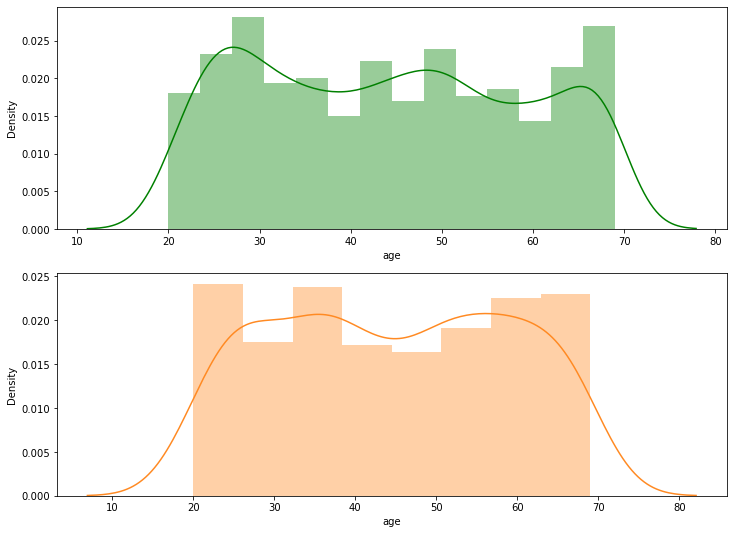

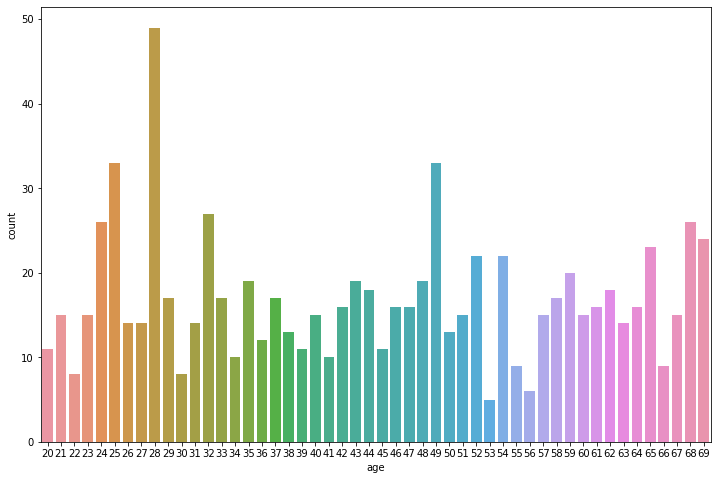

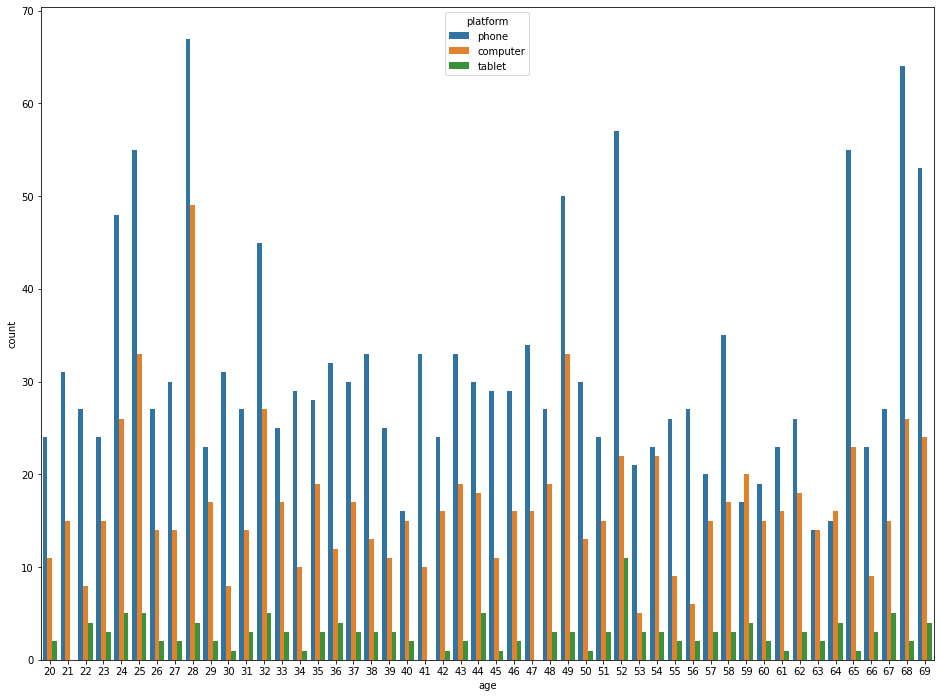

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('user_data.csv')
df2 = pd.read_csv('logs.csv')

#define client/clients which successfully connected max times
list_of_max_conn_clients = df2.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .query('success > 3')['client'] \
    .tolist()
print(f'High activity clients: {list_of_max_conn_clients} \n')

#define success connections among clients groupped by platform
df2.query('success == True').groupby(['platform'], as_index = False).agg({'success' : 'count'})

#define success connections among every clients to build disribution graphs
df2.query('success == True').groupby(['client'], as_index = False).agg({'success' : 'count'})

#merge
full_client_df = df1.merge(df2, on = 'client', how = 'inner')

#define premium clients' platforms, count
client_plat = full_client_df[full_client_df['premium'] == True] \
    .groupby('platform', as_index = False) \
    .agg({'client' : 'count'}) \
    .rename(columns = {'client' : 'count'}) \
    .reset_index(drop = True)
print(f'Clients\' platforms\' types \n{client_plat}')

#build distribution of clients' success connections by age and type. Build two charts
print('\n\nBuild distribution of clients\' success connections by age and type\n')
print('describe age activity of premium and not clients\n')
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize = (12, 9))
sns.distplot(full_client_df.query('premium == False').age, ax = ax[0], kde = True, color = 'green')
sns.distplot(full_client_df.query('premium == True').age, ax = ax[1], kde = True, color = '#FF8A23')

#build distribution of clients' success connections  by age and platform 'computer'
print('\nBuild distribution of clients\' success connections  by age and platform \'computer\'')
print('describe age activity of clients using computer\n')
age_clients_conn = full_client_df[full_client_df['platform'] == 'computer'] \
    .query('success == True')[['age','success']]
plt.figure(figsize = (12,8))
sns.countplot(x = 'age', data = age_clients_conn)

#build distribution of clients' success connections by age and platform type
print('\nBuild distribution of clients\' success connections by age and platform type')
print('describe age activity of clients using different devices\n')
age_platform_conn = full_client_df.query('success == True')
plt.figure(figsize = (16,12))
sns.countplot(x = 'age', hue = 'platform', data = age_platform_conn)